In [1]:
from MRF_non_random import *
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%load_ext line_profiler

In [4]:
%lprun -f MRF._pred_given_tree MRF._one_MRF_tree()

UsageError: Could not find module MRF._pred_given_tree.
NameError: name 'MRF' is not defined


In [5]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_data.csv")

In [6]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), B= 500, oos_pos=np.arange(150,200),trend_push=4,quantile_rate=0.3, print_b = True)

In [7]:

mrf_output = MRF._ensemble_loop()


Tree 1 out of 500
Tree 2 out of 500
Tree 3 out of 500
Tree 4 out of 500
Tree 5 out of 500
Tree 6 out of 500
Tree 7 out of 500
Tree 8 out of 500
Tree 9 out of 500
Tree 10 out of 500
Tree 11 out of 500
Tree 12 out of 500
Tree 13 out of 500
Tree 14 out of 500
Tree 15 out of 500
Tree 16 out of 500
Tree 17 out of 500
Tree 18 out of 500
Tree 19 out of 500
Tree 20 out of 500
Tree 21 out of 500
Tree 22 out of 500
Tree 23 out of 500
Tree 24 out of 500
Tree 25 out of 500
Tree 26 out of 500
Tree 27 out of 500
Tree 28 out of 500
Tree 29 out of 500
Tree 30 out of 500
Tree 31 out of 500
Tree 32 out of 500
Tree 33 out of 500
Tree 34 out of 500
Tree 35 out of 500
Tree 36 out of 500
Tree 37 out of 500
Tree 38 out of 500
Tree 39 out of 500
Tree 40 out of 500
Tree 41 out of 500
Tree 42 out of 500
Tree 43 out of 500
Tree 44 out of 500
Tree 45 out of 500
Tree 46 out of 500
Tree 47 out of 500
Tree 48 out of 500
Tree 49 out of 500
Tree 50 out of 500
Tree 51 out of 500
Tree 52 out of 500
Tree 53 out of 500
Tr

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 2 has size 1

In [ ]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [ ]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_1.csv", index_col = "Unnamed: 0")

In [ ]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [ ]:
my_preds.columns = np.arange(150, 200)

In [ ]:
phils_preds.columns = my_preds.columns

In [ ]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF_betas.csv", index_col = "Unnamed: 0")

In [ ]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
phils_betas.index = my_betas.index

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,0.017289,0.017220,0.020745,0.022769
std,0.013883,0.013516,0.017815,0.019764
min,0.000096,0.000396,0.000059,0.000040
25%,0.006499,0.007441,0.008009,0.007945
50%,0.014998,0.014913,0.015728,0.019283
75%,0.023094,0.023699,0.030179,0.032482
max,0.088241,0.071466,0.096737,0.113912


In [ ]:
mrf_output['betas']

array([[-1.52845937e-01,  8.53090942e-01,  9.98514072e-01,
         9.10362579e-01],
       [-8.05450732e-02,  9.04450437e-01,  9.91006168e-01,
         9.45262648e-01],
       [-1.10414544e-01,  8.75292618e-01,  9.86241180e-01,
         9.40897660e-01],
       [-1.22503749e-01,  9.14028912e-01,  9.99189674e-01,
         9.67342008e-01],
       [-1.26464523e-01,  9.11510953e-01,  1.00126369e+00,
         9.60450447e-01],
       [-7.65436771e-02,  9.30285382e-01,  9.96721002e-01,
         9.60438794e-01],
       [-9.24384051e-02,  9.16939756e-01,  1.00139553e+00,
         9.58283225e-01],
       [-1.19345797e-01,  8.83151879e-01,  9.73476843e-01,
         9.19212367e-01],
       [-1.00560731e-01,  8.86827420e-01,  9.90261387e-01,
         9.34196933e-01],
       [-1.23838952e-01,  9.48800858e-01,  1.01168400e+00,
         9.80258134e-01],
       [-1.12028783e-01,  9.21504695e-01,  1.01490805e+00,
         9.58940807e-01],
       [-1.04384498e-01,  9.28117776e-01,  9.93644329e-01,
      

<AxesSubplot:>

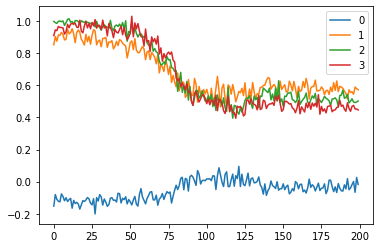

In [ ]:
pd.DataFrame(mrf_output['betas']).plot()

# pd.DataFrame(phils_betas).plot()

Text(0.5, 0.98, 'Betas from Python and R implementation. Python (light) and R (dark) colors.')

[6.0, 4.0]

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

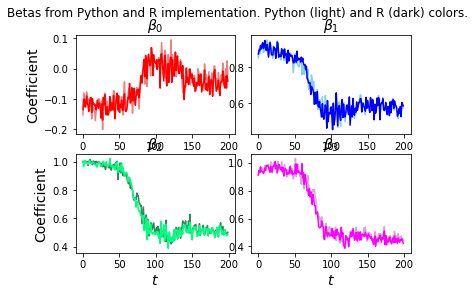

In [ ]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation. Python (light) and R (dark) colors.")

plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

plt.rcParams['figure.figsize'] = (20, 10)
ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, 'R versus Python implementation: average of forecasts')

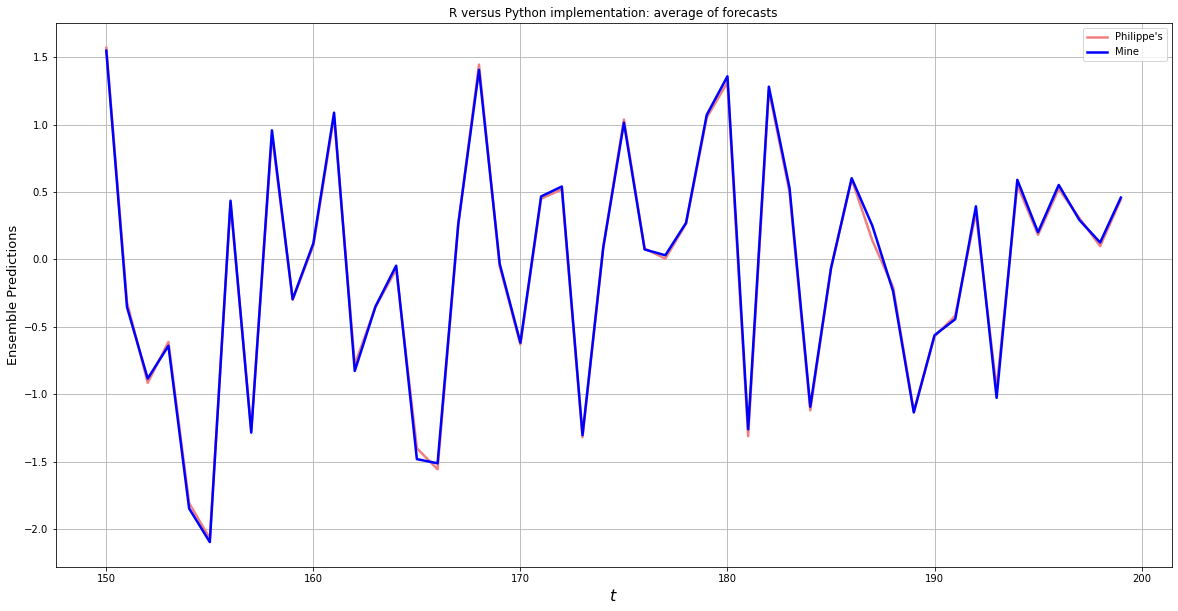

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("R versus Python implementation: average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)